# Classification of Bank Customers into credit score categories

Problem Statement:
Over the years, the company has collected basic bank details and gathered a lot of credit-related information.
The management wants to build an intelligent system to segregate the people into credit
score brackets to reduce manual efforts.



Objective: The objective of this project is to explore the data to identify the pattern that causes
the person to have a good or bad or standard type credit score and build a machine
learning model that should be able to predict or classify the credit score type. 

The dataset consists of all the basic bank details of the customers.

1. ID - Represents a unique identification of an entry.
2. CUSTOMER ID - This represents the unique identification of a person.
3. MONTH - Represents the month of the year.
4. NAME - Represents the name of a person.
5. AGE - Represents the age of the person.
6. SSN - Represents the social security number of the person.
7. OCCUPATION - Represents the occupation of the person.
8. ANNUAL INCOME - Represents the yearly income of the person.
9. MONTHLY IN-HAND SALARY - Represents the monthly base salary of a person.
10. NUM BANK ACCOUNTS - This represents the number of bank accounts a person
holds.
11. NUM CREDIT CARD - This represents the number of other credit cards held by the
person.
12. INTEREST Rate - This represents the interest rate on a credit card.
13. NUM OF LOAN - Represents the number of loans taken from the bank.
14. TYPE OF LOAN - Represents the type of loan taken by the person.
15. DELAY FROM DUE DATE - Represents the average number of days delayed from the
payment date.
16. NUM OF DELAYED PAYMENT - Represents the average number of payments
delayed by a person.
17. CHANGED CREDIT LIMIT - This represents the percentage change in the credit card
limit.
18. NUM CREDIT INQUIRIES - Represents the number of credit card inquiries.
19. CREDIT MIX - This represents the classification of the mix of credits. A credit mix refers to the multiple types of loan accounts you hold, such as credit cards, student loans, mortgages, and car loans.
20. OUTSTANDING DEBT - This represents the remaining debt to be paid(in USD).
21. CREDIT UTILIZATION RATIO - This represents the utilization ratio of credit cards.
22. CREDIT HISTORY AGE - This represents the age of the credit history of the person.
23. PAYMENT OF MIN AMOUNT - Represents whether only the minimum amount was
paid by the person.
24. TOTAL EMI PER MONTH - Represents the monthly EMI payments(in USD).
25. AMOUNT INVESTED MONTHLY - Represents the monthly amount invested by the
customer(in USD)
26. PAYMENT BEHAVIOUR - Represents the payment behavior of the customer (in
USD)
27. MONTHLY BALANCE - Represents the monthly amount of the customer (in USD).

### Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

Train data and test data are combined for preprocessing. 

After preprocessing, train data is separated from test data.

After training the model, it is used to predict credit score category of bank customers.

## Data Collection and Extraction

#### FREQUENTLY ASKED INTERVIEW QUESTIONS


##### 1. What tools and technologies are you familiar with for data extraction?
##### 2. Explain the concept of web scraping.

##### 3. Describe the process you follow to extract data from a database. 

In [ ]:
# Answer:

#Use a database client or an appropriate library (e.g., pyodbc or SQLAlchemy for Python) to establish a connection.
import pyodbc
connection = pyodbc.connect('DRIVER={SQL Server}; SERVER=server_name; DATABASE=database_name; UID=user; PWD=password')

#Use the established connection to execute the SQL query.
cursor = connection.cursor()
cursor.execute('SELECT column1, column2 FROM table_name')
rows = cursor.fetchall()

cursor.close()
connection.close()

##### 4. What are the different ways to import or extract data from multiple source file such as excel, json, etc., into pandas df?

In [ ]:
# From csv file
df = pd.read_csv('file.csv')

# From Excel file
df = pd.read_excel('file.xlsx', sheet_name='Sheet1')

# From json files
df = pd.read_json('file.json')

# From SQL databases
from sqlalchemy import create_engine

engine = create_engine('sqlite:///database.db')
df = pd.read_sql('SELECT * FROM table_name', engine)

# From API endpoint
import requests
response = requests.get('https://api.example.com/data')
data = response.json()
df = pd.DataFrame(data)

# From parquet file
df = pd.read_parquet('file.parquet')

# From XML file
df = pd.read_xml('file.xml')

In [ ]:
#############################################################################################################################

In [2]:
# Importing train dataset for credit score classification
df =pd.read_csv('train.csv')
df.head().T

,0,1,2,3,4
ID,0x1602,0x1603,0x1604,0x1605,0x1606
Customer_ID,CUS_0xd40,CUS_0xd40,CUS_0xd40,CUS_0xd40,CUS_0xd40
Month,January,February,March,April,May
Name,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh
Age,23,23,-500,23,23
SSN,821-00-0265,821-00-0265,821-00-0265,821-00-0265,821-00-0265
Occupation,Scientist,Scientist,Scientist,Scientist,Scientist
Annual_Income,19114.12,19114.12,19114.12,19114.12,19114.12
Monthly_Inhand_Salary,1824.843333,NaN,NaN,NaN,1824.843333
Num_Bank_Accounts,3,3,3,3,3


In [ ]:
# Importing test dataset for credit score classification

In [3]:
df_test =pd.read_csv('test.csv')
df_test.head().T

,0,1,2,3,4
ID,0x160a,0x160b,0x160c,0x160d,0x1616
Customer_ID,CUS_0xd40,CUS_0xd40,CUS_0xd40,CUS_0xd40,CUS_0x21b1
Month,September,October,November,December,September
Name,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Rick Rothackerj
Age,23,24,24,24_,28
SSN,821-00-0265,821-00-0265,821-00-0265,821-00-0265,004-07-5839
Occupation,Scientist,Scientist,Scientist,Scientist,_______
Annual_Income,19114.12,19114.12,19114.12,19114.12,34847.84
Monthly_Inhand_Salary,1824.843333,1824.843333,1824.843333,NaN,3037.986667
Num_Bank_Accounts,3,3,3,3,2


In [5]:
df.shape

(100000, 28)

In [6]:
df_test.shape

(50000, 27)

In [4]:
df_concat = pd.concat([df, df_test], ignore_index=True )
df_concat.shape

(150000, 28)

In [7]:
df_concat_copy = df_concat.copy()

# Data Pre-processing

In [8]:
df_concat.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [9]:
#Name- Does not add value to the case study. (Dropped the feature)
#Month - Does not add value to the case study. (Dropped the feature)
#SSN - Does not add value to the case study. (Dropped the feature)

df_concat = df_concat.drop('Month', axis=1)
df_concat = df_concat.drop('Name', axis=1)
df_concat = df_concat.drop('SSN', axis=1)

In [10]:
# Data cleaning on loan column


df_concat['Type_of_Loan'] = df_concat['Type_of_Loan'].replace(np.nan, 'None')

# Defining separate feature for each type of loan  

s1=set()
df_concat['L1']=df_concat['Type_of_Loan'].str.split(', ')
s1 = set().union(*df_concat['L1'].apply(set))

s3=set()
for i in s1:
    if 'and ' not in i:
        s3.add(i)
    
s3.remove('Not Specified')

for i in s3:
    df_concat[i] = df_concat['L1'].apply(lambda x: 1 if i in x else 0 )
    
df_concat.rename(columns={'None': 'No_loan'}, inplace=True)

s4={'No_loan','Auto Loan',
 'Credit-Builder Loan',
 'Debt Consolidation Loan',
 'Home Equity Loan',
 'Mortgage Loan',
 'Payday Loan',
 'Personal Loan',
 'Student Loan'}

for i in s4:
    print(df_concat[i].value_counts(normalize=True))

0   0.885920
1   0.114080
Name: No_loan, dtype: float64
0   0.747200
1   0.252800
Name: Student Loan, dtype: float64
0   0.746560
1   0.253440
Name: Mortgage Loan, dtype: float64
0   0.750640
1   0.249360
Name: Debt Consolidation Loan, dtype: float64
0   0.751840
1   0.248160
Name: Auto Loan, dtype: float64
0   0.747440
1   0.252560
Name: Home Equity Loan, dtype: float64
0   0.747280
1   0.252720
Name: Personal Loan, dtype: float64
0   0.739120
1   0.260880
Name: Credit-Builder Loan, dtype: float64
0   0.740960
1   0.259040
Name: Payday Loan, dtype: float64


In [16]:
#Age - Remove "_". Should be numeric. Age in between 0 to 100.

df_concat['Age'] = df_concat['Age'].str.strip('_')

In [12]:
#Occupation- Remove "_".

df_concat.Occupation.replace('_______', np.NaN, inplace=True)

In [13]:
# Replacing np.NaN in occupation by forward filling method

df_concat.Occupation.fillna(method='ffill', inplace = True)
df_concat.Occupation.isnull().sum()

0

In [14]:
#Occupation- Remove "_". 
#Annual income- Remove "_". 
#Num_of_Loan- Remove "_". 
#Num_of_Delayed_Payment- Remove "_". 
#Changed_Credit_Limit- Remove "_". 

df_concat['Occupation'] = df_concat['Occupation'].str.strip('_')
df_concat['Annual_Income'] = df_concat['Annual_Income'].str.strip('_')
df_concat['Num_of_Loan'] = df_concat['Num_of_Loan'].str.strip('_')
df_concat['Num_of_Delayed_Payment'] = df_concat['Num_of_Delayed_Payment'].str.strip('_')
df_concat['Changed_Credit_Limit'] = df_concat['Changed_Credit_Limit'].str.strip('_')

In [15]:
#Age- Remove "_". 
#Credit_Mix- Remove "_". 
#Outstanding_Debt- Remove "_". 
#Amount_invested_monthly- Remove "_". 
#Monthly_Balance- Remove "_".

df_concat['Age'] = df_concat['Age'].str.strip('_')
df_concat['Credit_Mix'] = df_concat['Credit_Mix'].str.strip('_')
df_concat['Outstanding_Debt'] = df_concat['Outstanding_Debt'].str.strip('_')
df_concat['Amount_invested_monthly'] = df_concat['Amount_invested_monthly'].str.strip('_')
df_concat['Monthly_Balance'] = df_concat['Monthly_Balance'].str.strip('_')

### Null Values Imputation

#### FREQUENTLY ASKED INTERVIEW QUESTIONS

##### What are some common methods to handle missing data?

##### How do you deal with duplicates in your dataset?

##### What is the difference between mean imputation and median imputation? When would you use median imputation?

-- Replacing missing values with the median of the column is more robust to outliers and is preferable when the data has outliers or is skewed.

For the same customer, the dataset includes records taken in different months.

Hence, the records of same customers are grouped and median for other numerical features are computed.

These computed median values are used for null values imputation.

#### By Median

In [17]:
gb1= df_concat.groupby('Customer_ID')['Monthly_Inhand_Salary'].median().to_dict()
gb1

{'CUS_0x1000': 2706.1616666666664,
 'CUS_0x1009': 4250.39,
 'CUS_0x100b': 9549.7825,
 'CUS_0x1011': 5208.8725,
 'CUS_0x1013': 7962.415000000001,
 'CUS_0x1015': 3725.585,
 'CUS_0x1018': 5014.5675,
 'CUS_0x1026': 14463.856666666668,
 'CUS_0x102d': 7256.043333333334,
 'CUS_0x102e': 4197.953333333334,
 'CUS_0x1032': 5274.245,
 'CUS_0x1037': 1086.42375,
 'CUS_0x1038': 10959.43,
 'CUS_0x103e': 8262.233333333334,
 'CUS_0x1041': 894.1758333333332,
 'CUS_0x1044': 2748.799166666666,
 'CUS_0x1048': 3680.295,
 'CUS_0x104a': 1461.4491666666663,
 'CUS_0x104e': 1688.405833333333,
 'CUS_0x104f': 992.73625,
 'CUS_0x1051': 2859.518333333333,
 'CUS_0x1056': 1196.8216666666667,
 'CUS_0x1057': 7250.096666666667,
 'CUS_0x105b': 2289.593700256465,
 'CUS_0x105c': 10596.8,
 'CUS_0x1063': 10628.896666666666,
 'CUS_0x1069': 4799.445,
 'CUS_0x106f': 11102.589999999998,
 'CUS_0x1075': 1933.468717801689,
 'CUS_0x107c': 4179.2125,
 'CUS_0x107e': 6269.9925,
 'CUS_0x1087': 3377.7608333333333,
 'CUS_0x108a': 2554.81382

In [18]:
df_concat['Monthly_Inhand_Salary']=df_concat['Monthly_Inhand_Salary'].fillna(df_concat['Customer_ID'].map(gb1))
df_concat.Monthly_Inhand_Salary.isnull().sum()

0

In [19]:
df_concat['Num_of_Loan'] = df_concat['Num_of_Loan'].astype(float)

In [20]:
gb2= df_concat.groupby('Customer_ID')['Num_of_Delayed_Payment'].median().to_dict()
gb2

{'CUS_0x1000': 25.0,
 'CUS_0x1009': 18.0,
 'CUS_0x100b': 7.0,
 'CUS_0x1011': 15.0,
 'CUS_0x1013': 9.0,
 'CUS_0x1015': 9.0,
 'CUS_0x1018': 22.0,
 'CUS_0x1026': 2.0,
 'CUS_0x102d': 5.0,
 'CUS_0x102e': 10.0,
 'CUS_0x1032': 9.0,
 'CUS_0x1037': 15.0,
 'CUS_0x1038': 13.0,
 'CUS_0x103e': 17.0,
 'CUS_0x1041': 17.0,
 'CUS_0x1044': 4.0,
 'CUS_0x1048': 8.0,
 'CUS_0x104a': 6.0,
 'CUS_0x104e': 17.0,
 'CUS_0x104f': 19.0,
 'CUS_0x1051': 11.0,
 'CUS_0x1056': 16.0,
 'CUS_0x1057': 20.0,
 'CUS_0x105b': 12.0,
 'CUS_0x105c': 6.0,
 'CUS_0x1063': 16.0,
 'CUS_0x1069': 17.0,
 'CUS_0x106f': 7.0,
 'CUS_0x1075': 11.0,
 'CUS_0x107c': 16.0,
 'CUS_0x107e': 10.0,
 'CUS_0x1087': 11.0,
 'CUS_0x108a': 15.0,
 'CUS_0x1096': 20.0,
 'CUS_0x1098': 13.0,
 'CUS_0x109b': 12.0,
 'CUS_0x109d': 18.0,
 'CUS_0x109f': 1.0,
 'CUS_0x10a9': 10.0,
 'CUS_0x10aa': 10.0,
 'CUS_0x10ac': 11.0,
 'CUS_0x10b3': 0.0,
 'CUS_0x10b6': 12.0,
 'CUS_0x10bb': 3.0,
 'CUS_0x10c0': 25.0,
 'CUS_0x10c5': 5.0,
 'CUS_0x10d7': 19.0,
 'CUS_0x10dd': 19.0,
 'CUS_0

In [21]:
df_concat['Num_of_Delayed_Payment']=df_concat['Num_of_Delayed_Payment'].fillna(df_concat['Customer_ID'].map(gb2))
df_concat.Num_of_Delayed_Payment.isnull().sum()

0

In [22]:
gb3= df_concat.groupby('Customer_ID')['Num_Credit_Inquiries'].median().to_dict()
gb3

{'CUS_0x1000': 11.0,
 'CUS_0x1009': 4.0,
 'CUS_0x100b': 4.0,
 'CUS_0x1011': 7.0,
 'CUS_0x1013': 3.0,
 'CUS_0x1015': 9.0,
 'CUS_0x1018': 8.0,
 'CUS_0x1026': 3.0,
 'CUS_0x102d': 3.0,
 'CUS_0x102e': 4.0,
 'CUS_0x1032': 9.0,
 'CUS_0x1037': 3.0,
 'CUS_0x1038': 10.0,
 'CUS_0x103e': 4.0,
 'CUS_0x1041': 10.0,
 'CUS_0x1044': 5.0,
 'CUS_0x1048': 7.0,
 'CUS_0x104a': 4.0,
 'CUS_0x104e': 6.0,
 'CUS_0x104f': 7.0,
 'CUS_0x1051': 5.0,
 'CUS_0x1056': 8.0,
 'CUS_0x1057': 4.0,
 'CUS_0x105b': 0.0,
 'CUS_0x105c': 0.0,
 'CUS_0x1063': 12.0,
 'CUS_0x1069': 5.0,
 'CUS_0x106f': 8.0,
 'CUS_0x1075': 3.0,
 'CUS_0x107c': 7.0,
 'CUS_0x107e': 8.0,
 'CUS_0x1087': 7.0,
 'CUS_0x108a': 15.0,
 'CUS_0x1096': 3.0,
 'CUS_0x1098': 8.0,
 'CUS_0x109b': 1.0,
 'CUS_0x109d': 11.0,
 'CUS_0x109f': 0.0,
 'CUS_0x10a9': 4.0,
 'CUS_0x10aa': 4.0,
 'CUS_0x10ac': 1.0,
 'CUS_0x10b3': 3.0,
 'CUS_0x10b6': 1.0,
 'CUS_0x10bb': 0.0,
 'CUS_0x10c0': 8.0,
 'CUS_0x10c5': 0.0,
 'CUS_0x10d7': 14.0,
 'CUS_0x10dd': 4.0,
 'CUS_0x10df': 14.0,
 'CUS_0x10e2

In [23]:
df_concat['Num_Credit_Inquiries']=df_concat['Num_Credit_Inquiries'].fillna(df_concat['Customer_ID'].map(gb3))
df_concat.Num_Credit_Inquiries.isnull().sum()

0

In [24]:
gb4= df_concat.groupby('Customer_ID')['Amount_invested_monthly'].median().to_dict()
gb4

{'CUS_0x1000': 161.99123459352285,
 'CUS_0x1009': 155.14105344210978,
 'CUS_0x100b': 424.0032051421769,
 'CUS_0x1011': 288.57138238355003,
 'CUS_0x1013': 323.42812789415797,
 'CUS_0x1015': 253.94590381175408,
 'CUS_0x1018': 289.8643803222876,
 'CUS_0x1026': 422.2033442904601,
 'CUS_0x102d': 327.9089464271358,
 'CUS_0x102e': 124.82374175928365,
 'CUS_0x1032': 152.32245488410052,
 'CUS_0x1037': 91.71666843614115,
 'CUS_0x1038': 447.24445995494773,
 'CUS_0x103e': 476.9266570683169,
 'CUS_0x1041': 43.16179080226145,
 'CUS_0x1044': 163.74197577772878,
 'CUS_0x1048': 133.51336229583663,
 'CUS_0x104a': 84.32642463336306,
 'CUS_0x104e': 74.86960972335518,
 'CUS_0x104f': 57.7897005015798,
 'CUS_0x1051': 72.35841856459858,
 'CUS_0x1056': 97.99882337668056,
 'CUS_0x1057': 385.5637343909271,
 'CUS_0x105b': 125.90837326936463,
 'CUS_0x105c': 458.85506213804473,
 'CUS_0x1063': 316.59670034091255,
 'CUS_0x1069': 144.0449534474321,
 'CUS_0x106f': 537.4187157412816,
 'CUS_0x1075': 115.02475756318265,
 

In [25]:
df_concat['Amount_invested_monthly']=df_concat['Amount_invested_monthly'].fillna(df_concat['Customer_ID'].map(gb4))
df_concat.Amount_invested_monthly.isnull().sum()

0

In [26]:
gb5= df_concat.groupby('Customer_ID')['Monthly_Balance'].median().to_dict()
gb5

{'CUS_0x1000': 345.6838416506744,
 'CUS_0x1009': 417.8696409917354,
 'CUS_0x100b': 824.3557245437784,
 'CUS_0x1011': 373.8809288201069,
 'CUS_0x1013': 542.1620582640456,
 'CUS_0x1015': 397.5606221143995,
 'CUS_0x1018': 276.22367830126484,
 'CUS_0x1026': 1079.865389370064,
 'CUS_0x102d': 630.1226363254034,
 'CUS_0x102e': 464.8998432861021,
 'CUS_0x1032': 480.75851651478183,
 'CUS_0x1037': 258.7706288168823,
 'CUS_0x1038': 661.8128424966927,
 'CUS_0x103e': 567.0214188379721,
 'CUS_0x1041': 252.20605063953434,
 'CUS_0x1044': 376.2660793823086,
 'CUS_0x1048': 272.86291414474647,
 'CUS_0x104a': 302.91163544834376,
 'CUS_0x104e': 307.7636799326268,
 'CUS_0x104f': 289.63507237550925,
 'CUS_0x1051': 442.73601214390817,
 'CUS_0x1056': 258.8146767383343,
 'CUS_0x1057': 636.422471527819,
 'CUS_0x105b': 410.1730863125262,
 'CUS_0x105c': 813.6220874228557,
 'CUS_0x1063': 815.5959250361045,
 'CUS_0x1069': 440.4317034383936,
 'CUS_0x106f': 751.6398997851745,
 'CUS_0x1075': 353.2159802447077,
 'CUS_0x

In [27]:
df_concat['Monthly_Balance']=df_concat['Monthly_Balance'].fillna(df_concat['Customer_ID'].map(gb5))
df_concat.Monthly_Balance.isnull().sum()

0

#### By mode

In [28]:
df_concat['Credit_History_Age'] = df_concat_copy['Credit_History_Age']

In [29]:
df_concat['Credit_History_Age'].mode()

0    17 Years and 11 Months
Name: Credit_History_Age, dtype: object

In [30]:
df_concat['Credit_History_Age'] = df_concat['Credit_History_Age'].fillna(np.NaN)

In [31]:
df_concat['Credit_History_Age'] = df_concat['Credit_History_Age'].replace(np.NaN , '17 Years and 11 Months')

In [32]:
df_concat['Credit_History_Age'].isnull().sum()

0

In [ ]:
# Converting credit_history_age to numerical feature

In [33]:
df_concat['Split_age'] = df_concat['Credit_History_Age'].str.split(' ')
df_concat['Split_age'].head()

0     [22, Years, and, 1, Months]
1    [17, Years, and, 11, Months]
2     [22, Years, and, 3, Months]
3     [22, Years, and, 4, Months]
4     [22, Years, and, 5, Months]
Name: Split_age, dtype: object

In [34]:
df_concat['Credit_History_Age_int'] = np.random.randint(df_concat.shape[0])
for i in range(0,df_concat.shape[0]):
    df_concat['Credit_History_Age_int'][i] = int(df_concat['Split_age'][i][0]) + int(df_concat['Split_age'][i][3])/12

In [ ]:
# Dropping columns Split_age and Credit_History_Age

In [35]:
df_concat =df_concat.drop('Split_age', axis=1)
df_concat =df_concat.drop('Credit_History_Age', axis=1)

In [36]:
# Changing datatype to float
df_concat['Annual_Income']=df_concat['Annual_Income'].astype(float)

Values greater than 100 are replaced by median. Though they are outliers, but removing all records with outliers result in loss of information from other features. Hence, values are replaced by median instead of removing them during outlier treatment.

In [37]:
# Replacing values greater than 100 by median

md= df_concat["Num_Credit_Card"].median()
df_concat['Num_Credit_Card'] = df_concat['Num_of_Loan'].apply(lambda x: md if x>100 or x<0 else x)

In [38]:
# Changing datatype to float
df_concat['Num_of_Loan']=df_concat['Num_of_Loan'].astype(float)

In [39]:
df_concat["Age"] = df_concat_copy['Age']
df_concat['Age'] = df_concat['Age'].str.strip('_')
df_concat['Age']=df_concat['Age'].astype(float)

In [40]:
# Replacing values greater than 100 by median
md= df_concat["Age"].median()
df_concat['Age'] = df_concat['Age'].apply(lambda x: md if x>100 else x)
df_concat['Age'] = df_concat['Age'].apply(lambda x: md if x<0 else x)

In [41]:
# Replacing values greater than 100 by median
md= df_concat["Num_of_Loan"].median()
df_concat['Num_of_Loan'] = df_concat['Num_of_Loan'].apply(lambda x: md if x>100 else x)
df_concat['Num_of_Loan'] = df_concat['Num_of_Loan'].apply(lambda x: md if x<0 else x)

In [42]:
# Replacing values greater than 100 by median
md= df_concat["Interest_Rate"].median()
df_concat['Interest_Rate'] = df_concat['Interest_Rate'].apply(lambda x: md if x>100 or x<0 else x)

In [43]:
# Changing datatype to float
df_concat['Num_of_Delayed_Payment']=df_concat['Num_of_Delayed_Payment'].astype(float)

In [44]:
# Replacing values greater than 100 by median
md= df_concat["Num_of_Delayed_Payment"].median()
df_concat['Num_of_Delayed_Payment'] = df_concat['Num_of_Delayed_Payment'].apply(lambda x: md if x>100 or x<0 else x)

In [45]:
df_concat['Changed_Credit_Limit'] = df_concat['Changed_Credit_Limit'].fillna(df_concat["Changed_Credit_Limit"].mode()) 

In [46]:
df_concat["Changed_Credit_Limit"].isnull().sum()

0

In [47]:
df_concat['Changed_Credit_Limit'] = df_concat['Changed_Credit_Limit'].replace('' , 0)

In [48]:
df_concat['Changed_Credit_Limit']=df_concat['Changed_Credit_Limit'].astype(float)

In [49]:
df_concat['Occupation']=df_concat_copy['Occupation']
df_concat['Occupation'] = df_concat['Occupation'].str.strip('_')

In [50]:
df_concat.Occupation.replace('', np.NaN, inplace=True)
df_concat.Occupation.fillna(method='ffill', inplace = True)
df_concat.Occupation.isnull().sum()

0

In [51]:
# Replacing values greater than 100 by median
md= df_concat["Num_Credit_Inquiries"].median()
df_concat['Num_Credit_Inquiries'] = df_concat['Num_Credit_Inquiries'].apply(lambda x: md if x>100 or x<0 else x)

In [52]:
df_concat['Num_Credit_Inquiries']=df_concat['Num_Credit_Inquiries'].astype(float)

In [55]:
#Credit_Mix - Replace observations of _ with mode. 


In [56]:
df_concat['Credit_Mix'].replace('', np.NaN, inplace=True)
df_concat.Credit_Mix.fillna(method='ffill', inplace = True)
df_concat.Credit_Mix.isnull().sum()

1

In [57]:
df_concat['Credit_Mix'].mode()

0    Standard
Name: Credit_Mix, dtype: object

In [58]:
df_concat['Credit_Mix']=df_concat['Credit_Mix'].replace( np.NaN,  'Standard')

In [59]:
df_concat.Credit_Mix.isnull().sum()

0

In [60]:
# Data cleaning of Outstanding_Debt

In [61]:
df_concat['Outstanding_Debt']=df_concat['Outstanding_Debt'].str.strip('_')

In [62]:
df_concat['Outstanding_Debt']=df_concat['Outstanding_Debt'].astype(float)

In [63]:
# Data cleaning of Payment_of_Min_Amount

In [66]:
mode=df_concat["Payment_of_Min_Amount"].mode()
mode

0    Yes
Name: Payment_of_Min_Amount, dtype: object

In [65]:
df_concat["Payment_of_Min_Amount"].value_counts()

Yes    78484
No     53516
NM     18000
Name: Payment_of_Min_Amount, dtype: int64

In [67]:
df_concat['Payment_of_Min_Amount']=df_concat['Payment_of_Min_Amount'].replace( 'NM',  np.NaN)
df_concat.Payment_of_Min_Amount.fillna(method='ffill', inplace = True)
df_concat.Payment_of_Min_Amount.isnull().sum()

0

In [68]:
# Data cleaning of Amount_invested_monthly

In [69]:
df_concat['Amount_invested_monthly']=df_concat['Amount_invested_monthly'].str.strip('_')

In [70]:
df_concat['Amount_invested_monthly']=df_concat['Amount_invested_monthly'].astype(float)

In [73]:
df_concat.Amount_invested_monthly.fillna(method='ffill', inplace = True)
df_concat.Amount_invested_monthly.isnull().sum()

0

In [74]:
df_concat.drop('Monthly_Balance', axis=1, inplace=True)

In [ ]:
# Data cleaning of Payment_Behaviour

In [75]:
mode=df_concat["Payment_Behaviour"].mode()
mode

0    Low_spent_Small_value_payments
Name: Payment_Behaviour, dtype: object

In [76]:
df_concat['Payment_Behaviour'].value_counts(normalize=True)

Low_spent_Small_value_payments     0.254713
High_spent_Medium_value_payments   0.176413
Low_spent_Medium_value_payments    0.137987
High_spent_Large_value_payments    0.137100
High_spent_Small_value_payments    0.113273
Low_spent_Large_value_payments     0.104513
!@9#%8                             0.076000
Name: Payment_Behaviour, dtype: float64

In [77]:
df_concat['Payment_Behaviour'] = df_concat_copy['Payment_Behaviour']
df_concat['Payment_Behaviour']=df_concat['Payment_Behaviour'].replace( '!@9#%8',  np.NaN)
df_concat.Payment_Behaviour.fillna(method='ffill', inplace = True)
df_concat.Payment_Behaviour.isnull().sum()

0

In [78]:
df_concat['Payment_Behaviour'].value_counts(normalize=True)

Low_spent_Small_value_payments     0.275173
High_spent_Medium_value_payments   0.191400
Low_spent_Medium_value_payments    0.149433
High_spent_Large_value_payments    0.148453
High_spent_Small_value_payments    0.122513
Low_spent_Large_value_payments     0.113027
Name: Payment_Behaviour, dtype: float64

In [79]:
df_target= df_concat['Credit_Score']

In [80]:
df_target=pd.DataFrame(df_target.loc[0:99999])

In [81]:
df_target.shape

(100000, 1)

In [82]:
df_target['Credit_Score'] = df_target['Credit_Score'].replace('Good', 2)
df_target['Credit_Score'] = df_target['Credit_Score'].replace('Standard', 1)
df_target['Credit_Score'] = df_target['Credit_Score'].replace('Poor', 0)

In [83]:
df_concat['Num_Bank_Accounts']=df_concat['Num_Bank_Accounts'].astype(float)
df_concat['Delay_from_due_date']=df_concat['Delay_from_due_date'].astype(float)
df_concat['Interest_Rate']=df_concat['Interest_Rate'].astype(float)

In [84]:
df_concat.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,No_loan,Student Loan,Mortgage Loan,Debt Consolidation Loan,Auto Loan,Home Equity Loan,Personal Loan,Credit-Builder Loan,Payday Loan,Credit_History_Age_int
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,33.477227,173055.202531,4192.647084,17.006940,3.614533,14.512340,3.527427,21.063400,13.427313,10.166229,6.304133,1426.220376,32.283309,1432.513579,638.163182,0.114080,0.252800,0.253440,0.249360,0.248160,0.252560,0.252720,0.260880,0.259040,18.539662
std,10.629711,1404214.602713,3182.841234,117.069476,2.620297,8.700260,2.605996,14.860154,6.203571,6.877983,4.142814,1155.127101,5.113315,8403.759977,2045.220592,0.317909,0.434619,0.434982,0.432644,0.431947,0.434482,0.434573,0.439116,0.438109,7.929617
min,14.000000,7005.930000,303.645417,-1.000000,0.000000,1.000000,0.000000,-5.000000,0.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333
25%,25.000000,19455.490000,1625.558333,3.000000,2.000000,8.000000,2.000000,10.000000,9.000000,4.970000,3.000000,566.072500,28.054731,30.947775,74.574704,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000
50%,33.000000,37578.610000,3091.000000,6.000000,3.000000,13.000000,3.000000,18.000000,14.000000,9.250000,6.000000,1166.155000,32.297058,71.280006,135.768699,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.916667
75%,42.000000,72796.905000,5951.373333,7.000000,5.000000,20.000000,5.000000,28.000000,18.000000,14.640000,9.000000,1945.962500,36.487954,166.279555,266.275431,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,24.500000
max,100.000000,24198062.000000,15204.633333,1798.000000,100.000000,100.000000,100.000000,67.000000,100.000000,36.970000,99.000000,4998.070000,50.000000,82398.000000,10000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,34.000000


In [ ]:
# Payment behaviour feature is split into two new features. i.e., Spending_Behaviour and Payment_values.
# For example, Low_spent_Small_value_payments is split at '_'. 
# Subsequently spending behaviour 'Low' and Payment value 'small' is accessed and inserted into new columns created in the end.

In [85]:
p=df_concat.columns.get_loc('Credit_History_Age_int')
p

33

In [86]:
df_concat['split1'] = df_concat['Payment_Behaviour'].str.split('_')
df_concat.insert(loc=p+1, column = 'Spending_Behaviour', value=[df_concat['split1'][i][0] for i in range(df_concat.shape[0]) ])
df_concat.insert(loc=p+2, column = 'Payment_values', value=[df_concat['split1'][i][2] for i in range(df_concat.shape[0]) ])

df_concat.dtypes

ID                           object
Customer_ID                  object
Age                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Credit_Score                 object
L1                           object
No_loan                       int64
Student Loan                  int64
Mortgage Loan                 int64
Debt Consolidation Loan     

In [87]:
df_concat.drop(['split1', 'Payment_Behaviour','Type_of_Loan','L1'] , axis=1, inplace=True)

In [88]:
cleaned_df_ID = df_concat.copy()

In [89]:
#ID drop
#Customer_ID drop
df_concat =df_concat.drop('ID', axis=1)
df_concat =df_concat.drop('Customer_ID', axis=1)

# EDA

#### FREQUENTLY ASKED INTERVIEW QUESTIONS

##### What are some key visualizations used in EDA and what insights can they provide?


Histograms: Show the distribution of a single variable, indicating skewness, kurtosis, and the presence of outliers.
    
Box Plots: Summarize the distribution of a variable and highlight the presence of outliers.
    
Scatter Plots: Visualize the relationship between two continuous variables, indicating trends, clusters, and outliers.
    
Pair Plots (or Scatterplot Matrix): Show relationships between all pairs of variables in a dataset.
    
Heatmaps: Display correlation coefficients between variables, indicating linear relationships and potential multicollinearity.
    
Bar Charts: Represent categorical data, showing the frequency or proportion of categories.

In [90]:
df_concat.shape

(150000, 31)

Separating train dataset from combined dataset

In [91]:
df_train= df_concat.loc[0:99999]

In [92]:
df_train.shape

(100000, 31)

In [93]:
df_train.tail(5)

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Credit_Score,No_loan,Student Loan,Mortgage Loan,Debt Consolidation Loan,Auto Loan,Home Equity Loan,Personal Loan,Credit-Builder Loan,Payday Loan,Credit_History_Age_int,Spending_Behaviour,Payment_values
99995,25.000000,Mechanic,39628.990000,3359.415833,4.000000,2.000000,7.000000,2.000000,23.000000,7.000000,11.500000,3.000000,Good,502.380000,34.663572,No,35.104023,60.971333,Poor,0,0,0,0,1,0,0,0,0,31.500000,High,Large
99996,25.000000,Mechanic,39628.990000,3359.415833,4.000000,2.000000,7.000000,2.000000,18.000000,7.000000,11.500000,3.000000,Good,502.380000,40.565631,No,35.104023,54.185950,Poor,0,0,0,0,1,0,0,0,0,31.583333,High,Medium
99997,25.000000,Mechanic,39628.990000,3359.415833,4.000000,2.000000,13.000000,2.000000,27.000000,6.000000,11.500000,3.000000,Good,502.380000,41.255522,No,35.104023,24.028477,Poor,0,0,0,0,1,0,0,0,0,31.666667,High,Large
99998,25.000000,Mechanic,39628.990000,3359.415833,4.000000,2.000000,7.000000,2.000000,20.000000,6.000000,11.500000,3.000000,Good,502.380000,33.638208,No,35.104023,251.672582,Standard,0,0,0,0,1,0,0,0,0,31.750000,Low,Large
99999,25.000000,Mechanic,39628.990000,3359.415833,4.000000,2.000000,7.000000,2.000000,18.000000,6.000000,11.500000,3.000000,Good,502.380000,34.192463,No,35.104023,167.163865,Poor,0,0,0,0,1,0,0,0,0,31.833333,Low,Large


Separating train dataset from combined dataset

In [94]:
df_test= df_concat.loc[100000:149999]

In [95]:
#dftrial = df_concat.loc[ 100000:149999, ['Age', 'Occupation']]
#dftrial

In [96]:
df_test.shape

(50000, 31)

In [97]:
df_train.shape

(100000, 31)

Creating a dataframe of categorical features from train data

In [98]:
df_train_cat= df_train.select_dtypes(include= [np.object])

In [99]:
df_train_cat.columns

Index(['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Credit_Score',
       'Spending_Behaviour', 'Payment_values'],
      dtype='object')

Creating a dataframe of numerical features from train data

In [100]:
df_train_num=df_train.drop(['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Credit_Score', 'Spending_Behaviour', 'Payment_values'], axis=1)
df_train_num.columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'No_loan',
       'Student Loan', 'Mortgage Loan', 'Debt Consolidation Loan', 'Auto Loan',
       'Home Equity Loan', 'Personal Loan', 'Credit-Builder Loan',
       'Payday Loan', 'Credit_History_Age_int'],
      dtype='object')

## Outlier Treatment

#### FREQUENTLY ASKED INTERVIEW QUESTIONS

##### Describe a method you use to detect and handle outliers in your data.

Answer: To detect and handle outliers, I typically use the
Interquartile Range (IQR) method. I first calculate the IQR
by finding the difference between the first quartile (Q1) and
the third quartile (Q3). Outliers are identified as data points
that fall below Q1 - 1.5IQR or above Q3 + 1.5IQR. Once
detected, I handle outliers by either removing them if they
are due to errors or using transformation techniques such
as log transformation to minimize their impact.
Additionally, I sometimes cap the outliers to a certain
percentile to reduce their influence on the overall analysis.

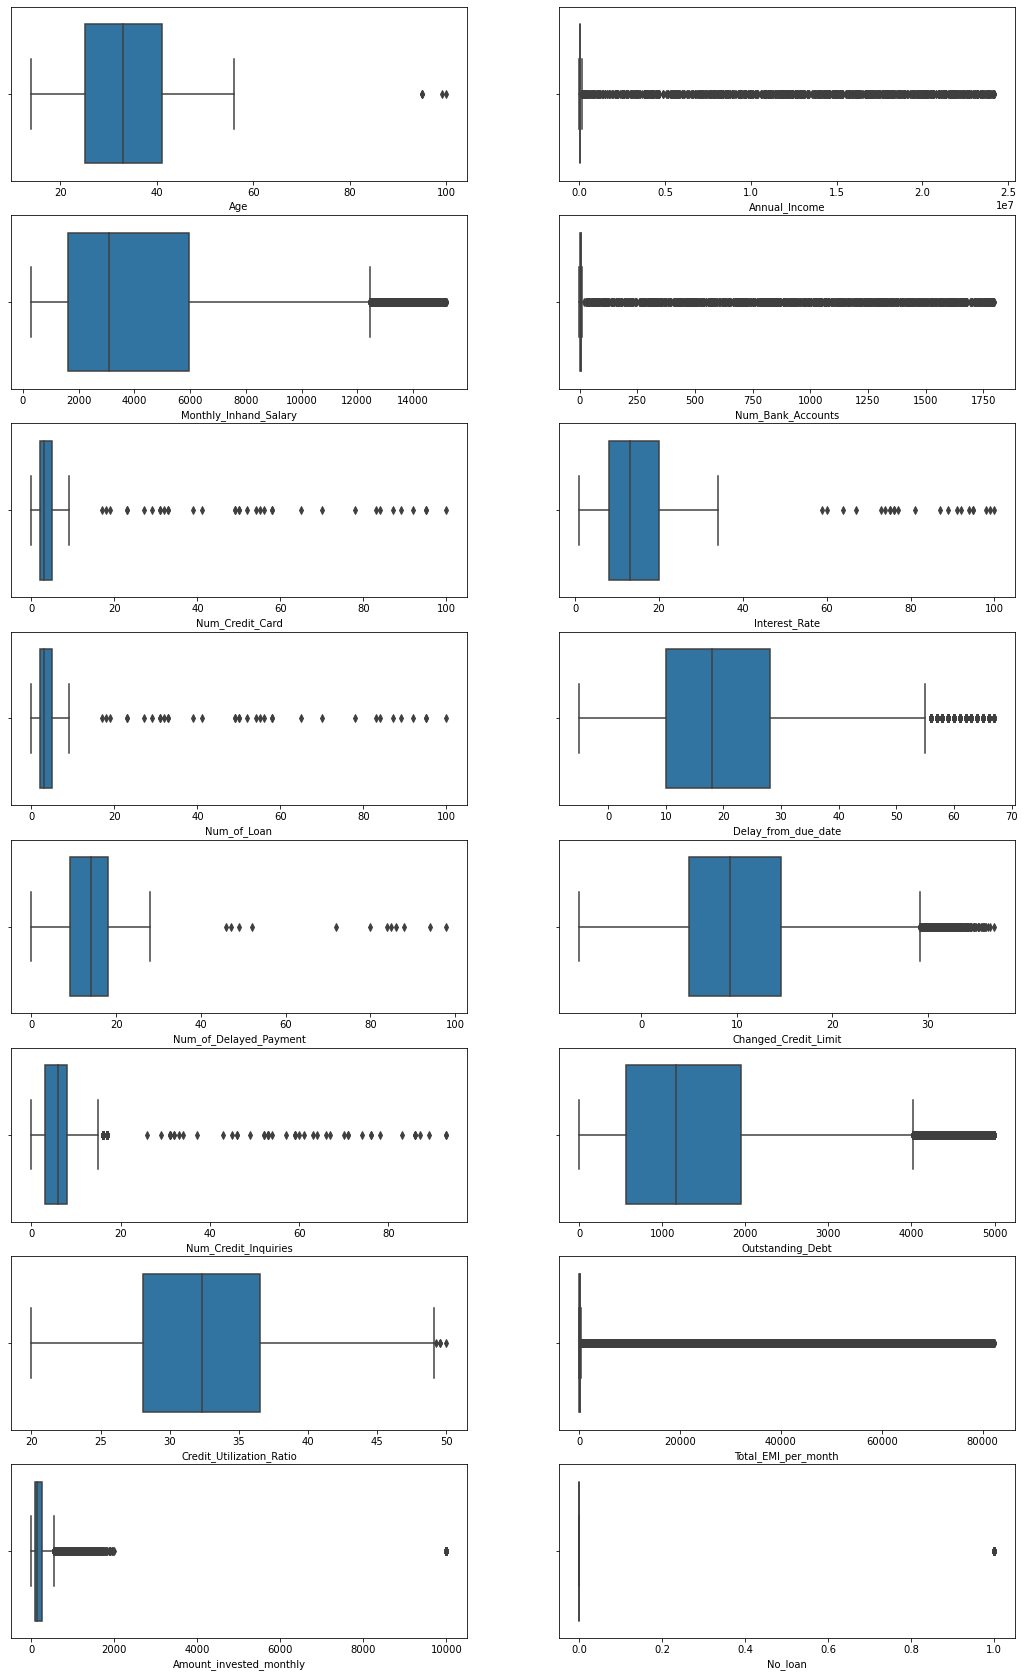

In [101]:
fig, ax = plt.subplots(nrows=8, ncols=2, figsize=(18,30))

for i, j in zip(df_train_num.columns, ax.flatten()):
    sns.boxplot(df_train_num[i], ax = j)

plt.show()

From the box plot above, Annual income, amount invested monthly, no loan, total EMI per month, monthly inhand salary will not be considered for outlier tratment to avoid significant loss of information. Outlier treatment is carried out for only few features.

In [103]:
df_train_outlier_treatment = df_train_num[['Age',  'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Num_Credit_Inquiries',
       'Delay_from_due_date','Num_of_Delayed_Payment', 'Changed_Credit_Limit','Credit_Utilization_Ratio']]

In [104]:
Q1 = df_train_outlier_treatment.quantile(0.25)
Q3 = df_train_outlier_treatment.quantile(0.75)

IQR = Q3-Q1

In [105]:
IQR

Age                        16.000000
Num_Bank_Accounts           4.000000
Num_Credit_Card             3.000000
Interest_Rate              12.000000
Num_of_Loan                 3.000000
Num_Credit_Inquiries        5.000000
Delay_from_due_date        18.000000
Num_of_Delayed_Payment      9.000000
Changed_Credit_Limit        9.690000
Credit_Utilization_Ratio    8.444096
dtype: float64

In [106]:
df_train = df_train[~((df_train < (Q1 - 1.5 * IQR)) | (df_train > (Q3 + 1.5 * IQR))).any(axis=1)]

# check the shape of the data 
df_train.shape

(93403, 31)

Checking box plot distribution after outlier treatment

In [107]:
df_train_num=df_train.drop(['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Credit_Score', 'Spending_Behaviour', 'Payment_values'], axis=1)
df_train_num.columns
col = df_train_num.columns
col

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'No_loan',
       'Student Loan', 'Mortgage Loan', 'Debt Consolidation Loan', 'Auto Loan',
       'Home Equity Loan', 'Personal Loan', 'Credit-Builder Loan',
       'Payday Loan', 'Credit_History_Age_int'],
      dtype='object')

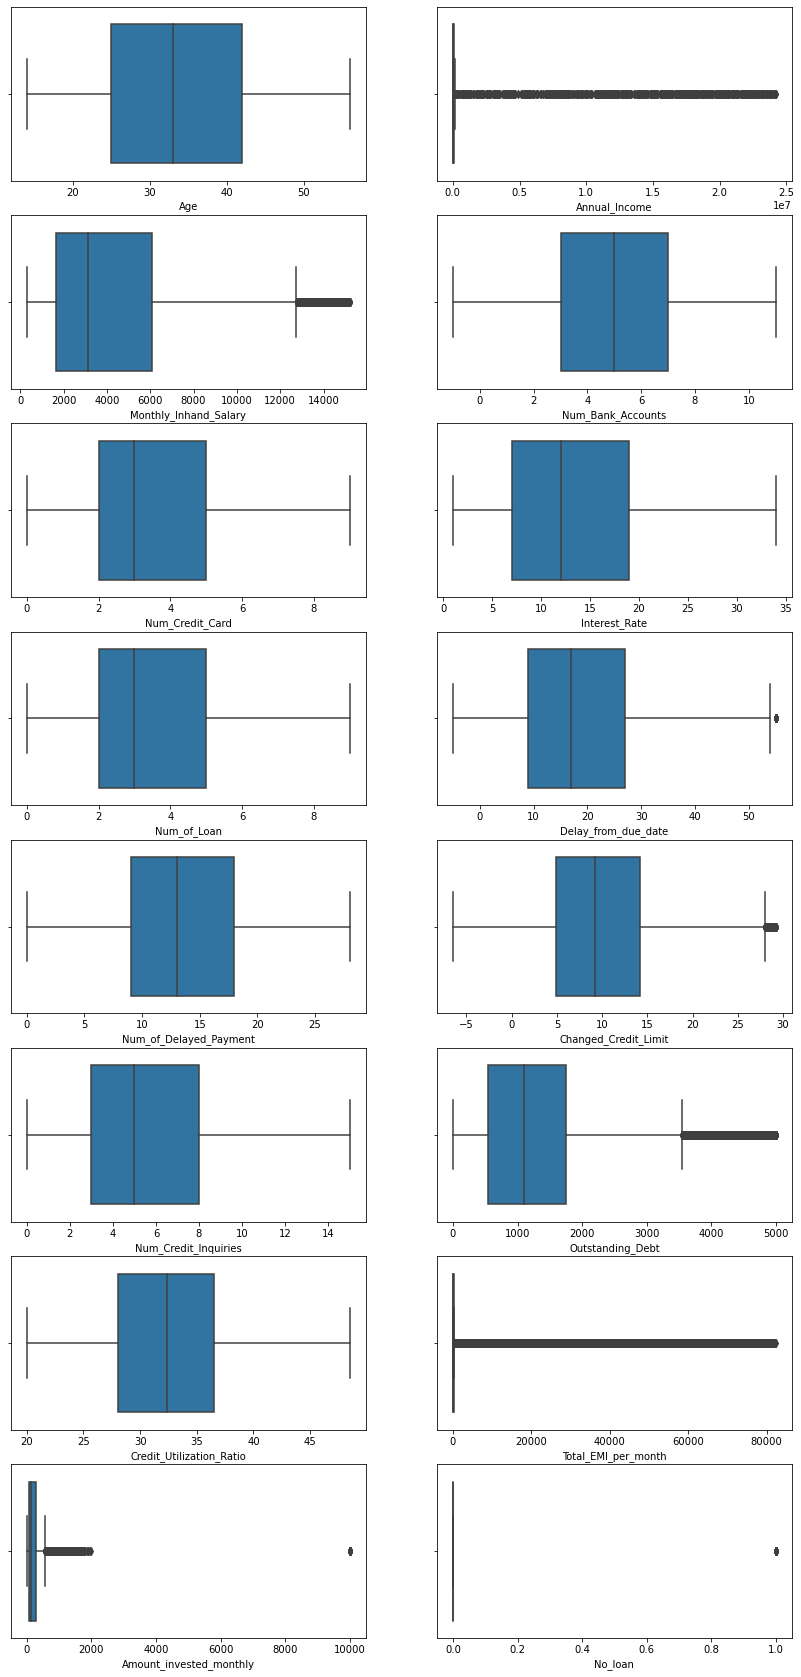

In [108]:
fig,ax=plt.subplots(nrows=8,ncols=2,figsize=(14,30))
for var,subplot in zip(df_train_num.columns,ax.flatten()):
    sns.boxplot(df_train[var],ax=subplot)
plt.show()

In [109]:
Y = df_train['Credit_Score']
Y.shape

(93403,)

In [110]:
Y = df_train['Credit_Score']
Y = Y.replace('Good', 2)
Y = Y.replace('Standard', 1)
Y = Y.replace('Poor', 0)
Y.shape

(93403,)

### Univariate Analysis

#### FREQUENTLY ASKED INTERVIEW QUESTIONS

##### Why is Univariate Analysis Important?

##### What are the common techniques used in univariate analysis?

Common techniques used in univariate analysis include:

Descriptive Statistics: Measures of central tendency (mean, median, mode) and dispersion (range, variance, standard deviation).

Frequency Distribution: Counting the frequency of each value or range of values.

Histogram: A graphical representation of the frequency distribution.

Box Plot: A graphical representation showing the distribution of data based on a five-number summary (minimum, first quartile, median, third quartile, and maximum).

Countplot

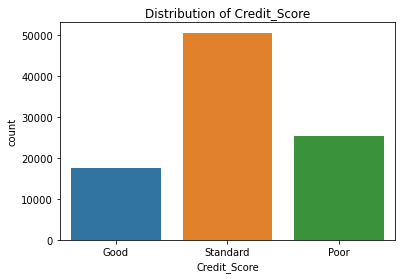

In [111]:
plt.figure(figsize=(6,4))
sns.countplot(df_train['Credit_Score']).set_title('Distribution of Credit_Score')

plt.show()

In [ ]:
# Target variable is fairly balanced.

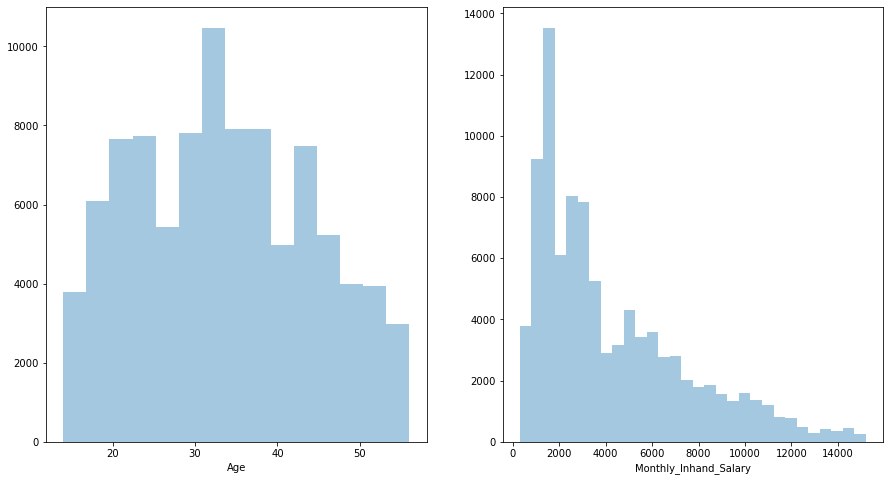

In [112]:
fig, axes = plt.subplots(1,2, figsize=(15,8))
sns.distplot(df_train['Age'], bins=15, kde=False, ax = axes[0], axlabel='Age')
sns.distplot(df_train['Monthly_Inhand_Salary'], bins=30, kde=False, ax = axes[1], axlabel='Monthly_Inhand_Salary')
plt.show()

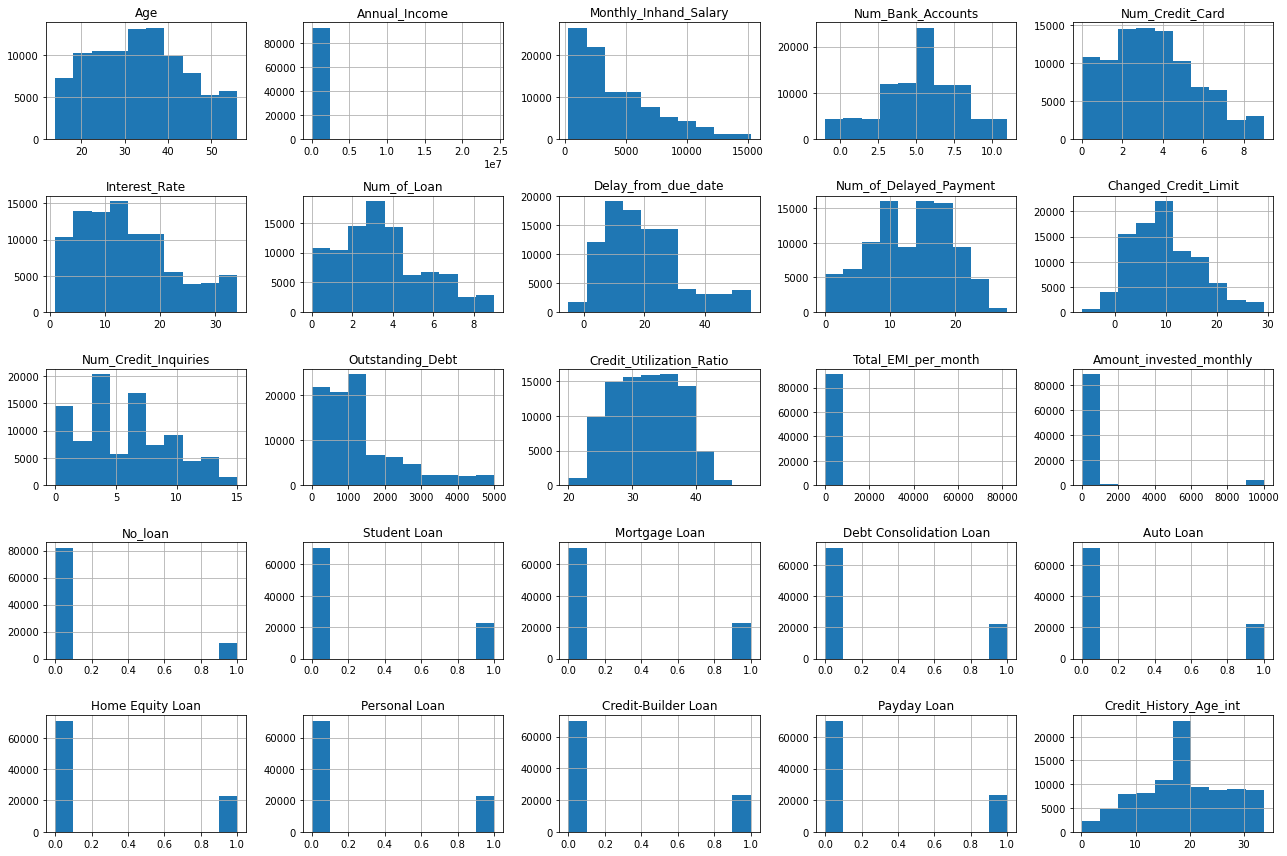

Skewness:


Age                         0.160497
Annual_Income              12.467654
Monthly_Inhand_Salary       1.095655
Num_Bank_Accounts          -0.145438
Num_Credit_Card             0.422006
Interest_Rate               0.593374
Num_of_Loan                 0.532115
Delay_from_due_date         0.828600
Num_of_Delayed_Payment     -0.150361
Changed_Credit_Limit        0.543656
Num_Credit_Inquiries        0.388673
Outstanding_Debt            1.330338
Credit_Utilization_Ratio    0.027882
Total_EMI_per_month         7.103945
Amount_invested_monthly     4.335294
No_loan                     2.334626
Student Loan                1.194242
Mortgage Loan               1.199257
Debt Consolidation Loan     1.228805
Auto Loan                   1.223138
Home Equity Loan            1.208040
Personal Loan               1.191403
Credit-Builder Loan         1.147795
Payday Loan                 1.164558
Credit_History_Age_int     -0.073527
dtype: float64

In [113]:
plt.rcParams["figure.figsize"] = [18,12]
df_train.hist()

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()  

# print the skewness for each numeric independent variable
print('Skewness:')

df_train.skew()

In [ ]:
#Numerical data of feature age, Num_Bank_Accounts, Interest_Rate, Num_of_Loan, Num_of_Delayed_Payment, Num_Credit_Inquiries, Credit_Utilization_Ratio,Credit_History_Age is fairly symmetrical.
#Numerical data of feature Delay_from_due_date, Changed_Credit_Limit is moderately skewed.
#Numerical data of feature Annual_Income, Monthly_Inhand_Salary, Outstanding_Debt,Total_EMI_per_month, Amount_invested_monthly is highly skewed.

### Bivariate Analysis

#### FREQUENTLY ASKED INTERVIEW QUESTIONS

##### What are the Common Techniques Used in Bivariate Analysis?

Answer: Common techniques in bivariate analysis include:

##### Scatter Plot: 
A graphical representation of the relationship between two variables.
    
##### Correlation Coefficient: 
A numerical measure (e.g., Pearsons r) that quantifies the strength and direction of the relationship between two variables.
                                              
##### Regression Analysis: 
A statistical method for modeling the relationship between a dependent variable and one independent variable (simple linear regression) or multiple independent variables (multiple regression).
    
##### Cross-tabulation (Contingency Table): 
A table used to examine the relationship between two categorical variables.
    
##### Chi-square Test: 
A statistical test to determine if there is a significant association between two categorical variables.
    
##### T-test and ANOVA: 
Used to compare the means of two groups or more to understand if there are significant differences in a continuous variable across different levels of a categorical variable.

Text(0.5, 1.0, 'Occupation VS. Credit Score')

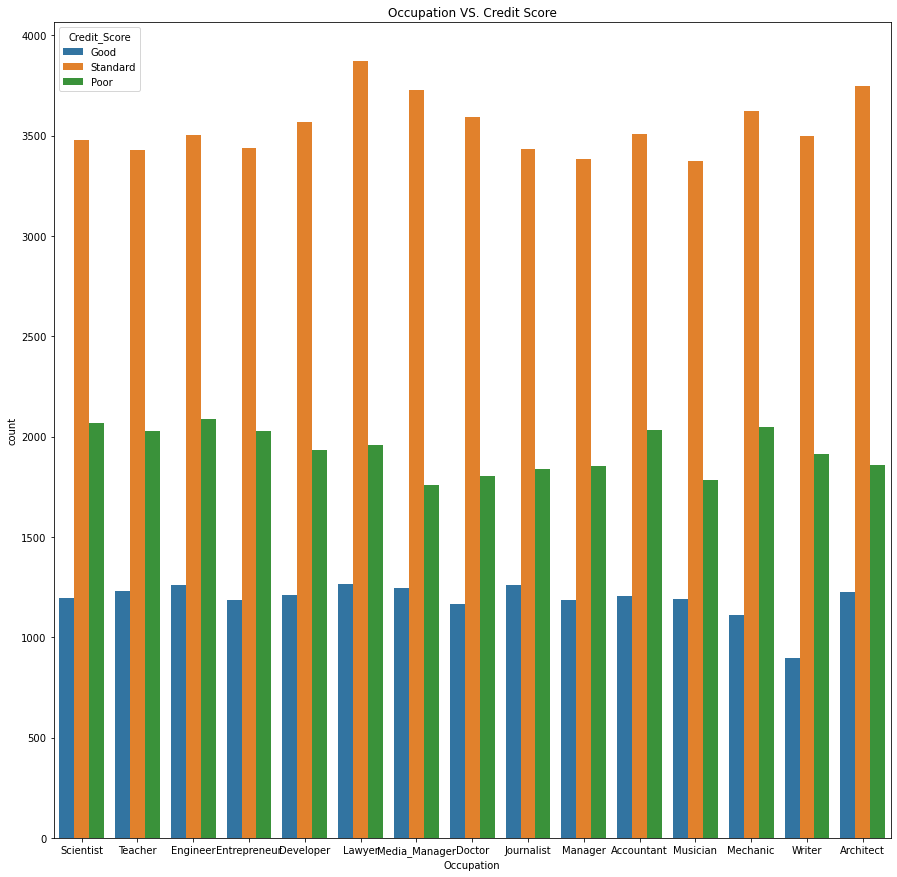

In [114]:
fig = plt.figure(figsize=(15,15))
sns.countplot(x= df_train_cat['Occupation'], hue = df_concat['Credit_Score']).set_title('Occupation VS. Credit Score')

In [115]:
# No significant variation is observed in the different buckets of credit score for customers belonging to different occupations.

Text(0.5, 1.0, 'Spending_Behaviour VS. Credit Score')

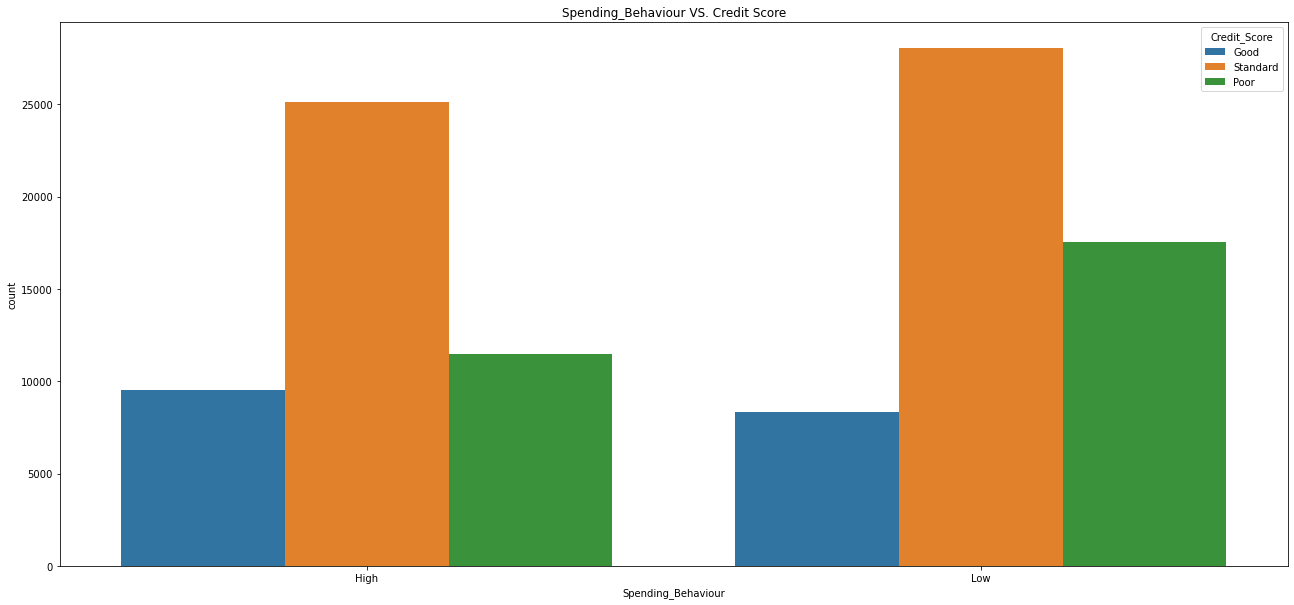

In [116]:
fig = plt.figure(figsize=(22,10))
sns.countplot(x= df_train_cat['Spending_Behaviour'], hue = df_concat['Credit_Score']).set_title('Spending_Behaviour VS. Credit Score')

In [117]:
# Majority of the customers with low spending behaviour are generally having standard or poor credit score.
# Count of the customers with high spending behaviour are having slightly good credit score compared to customers with high spending behaviour.

Text(0.5, 1.0, 'Payment_values VS. Credit Score')

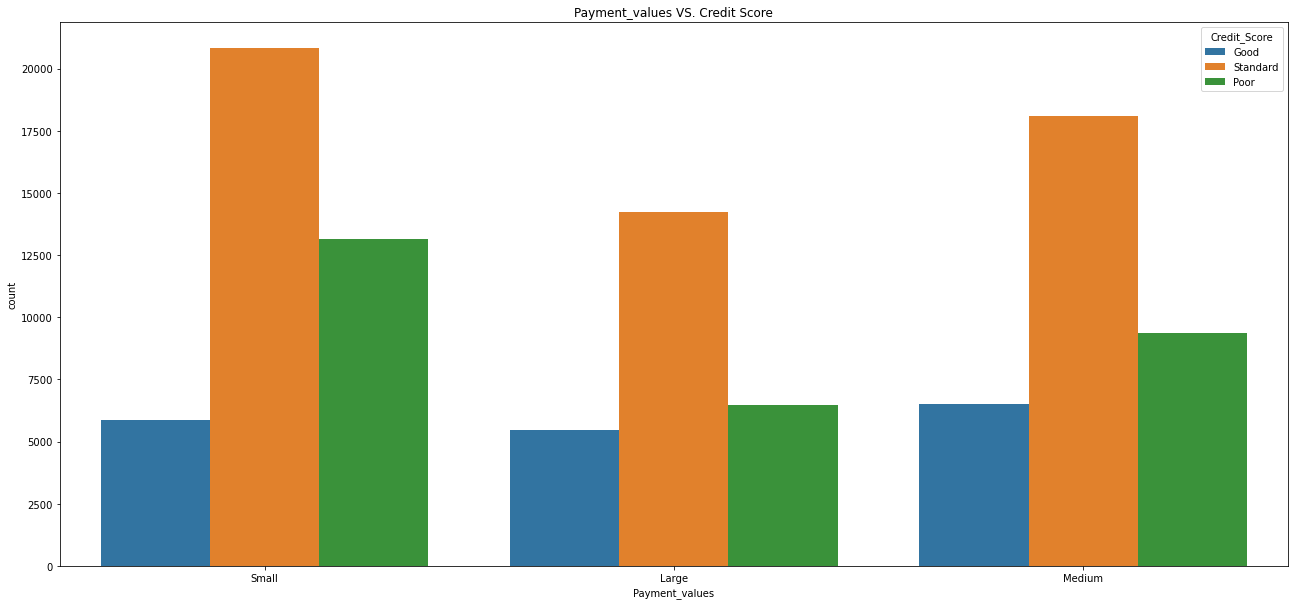

In [118]:
fig = plt.figure(figsize=(22,10))
sns.countplot(x= df_train_cat['Payment_values'], hue = df_concat['Credit_Score']).set_title('Payment_values VS. Credit Score')

In [119]:
# The customers with small payment values are generally having standard or poor credit score.

Text(0.5, 1.0, 'Payment_of_Min_Amount VS. Credit Score')

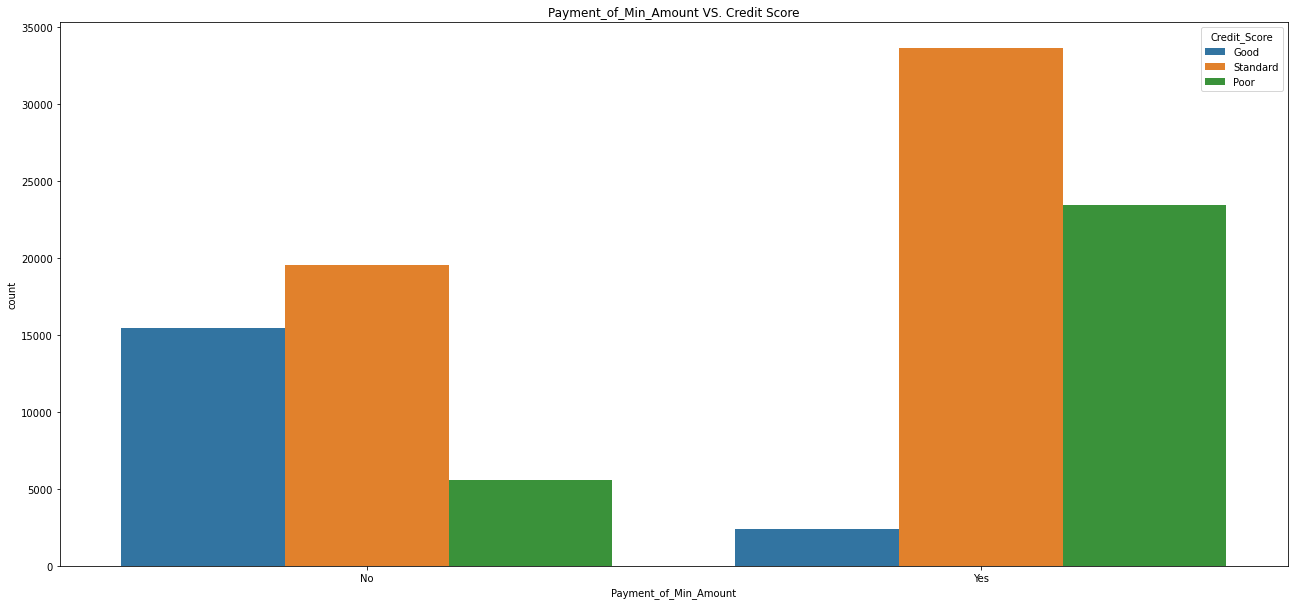

In [120]:
fig = plt.figure(figsize=(22,10))
sns.countplot(x= df_train_cat['Payment_of_Min_Amount'], hue = df_concat['Credit_Score']).set_title('Payment_of_Min_Amount VS. Credit Score')

In [ ]:
# Customers who has not paid only the minimum amount are having higher credit score.
# Payment_of_Min_Amount is found to be a very impacting feature in deciding the credit score.

### Multivariate analysis

In [121]:
df_train.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Credit_Score',
       'No_loan', 'Student Loan', 'Mortgage Loan', 'Debt Consolidation Loan',
       'Auto Loan', 'Home Equity Loan', 'Personal Loan', 'Credit-Builder Loan',
       'Payday Loan', 'Credit_History_Age_int', 'Spending_Behaviour',
       'Payment_values'],
      dtype='object')


#### FREQUENTLY ASKED INTERVIEW QUESTIONS

##### What is multicollinearity?

##### How can you detect multicollinearity in a regression model?

##### What are the consequences of multicollinearity in regression analysis?

##### In what situations does multicollinearity become particularly problematic in data analysis?

In [122]:
# Columns to be considered for multicollinearity check

c1 = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
        'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 
       'Total_EMI_per_month', 'Amount_invested_monthly']

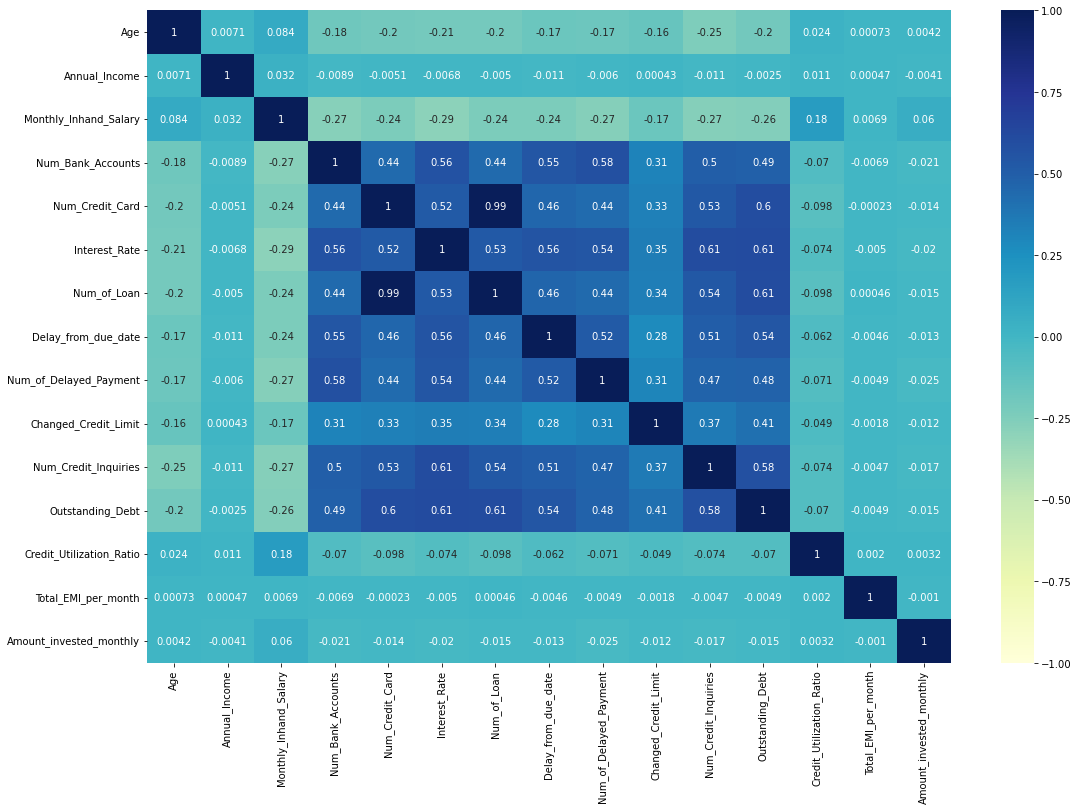

In [123]:
sns.heatmap(df_train[c1].corr(), annot = True, cmap = 'YlGnBu', vmin=-1, vmax=1)

# display the plot
plt.show()

In [124]:
#Number of loans and number of credit cards are found to be highly corelated. Hence, the feature Num_Credit_Card is dropped.

In [125]:
df_concat_new =df_concat.drop('Num_Credit_Card', axis=1)

### Statistical Analysis and Data Transformation

#### FREQUENTLY ASKED INTERVIEW QUESTIONS

##### What is normality in the context of data distribution? Why is it important to check for normality in data?

##### What are common methods to assess normality of data?

##### What statistical tests can you use to evaluate normality?

##### What are skewness and kurtosis, and how do they relate to normality testing?


Annual income

In [126]:
import statistics as st
from scipy import stats
from statsmodels.stats import weightstats as stests
from scipy.stats import shapiro
from statsmodels.stats import power

In [127]:
# Hypothesis :
# Null hypothesis: Data is normal 
# Alternate hypothesis: Data is not normal.

stat, p_value = shapiro(df_train['Annual_Income'])
stat, p_value
# alpha = 0.01




(0.07417398691177368, 0.0)

In [128]:
# p < alpha
# Do reject null hypothesis.
# Data is not normal.

### Scaling and Data Transformation

### Data Transformation Techniques

1. **Normalization (Min-Max Scaling):**
   - Scales data to a fixed range (often [0, 1]).
   - Use: When the data distribution is not Gaussian or when algorithms require features on a similar scale.


2. **Standardization (Z-score Scaling):**
   - Transforms data to have a mean of 0 and a standard deviation of 1.
   - Use: When the data distribution is approximately normal or when algorithms assume standardized data.


3. **Robust Scaling:**
   - Scales data based on percentiles (median and interquartile range) to mitigate the effects of outliers.
   - Use: When the data contains outliers or is not normally distributed.



4. **Log Transformation:**
   - Applies the logarithm function to data to reduce skewness.
   - Use: When data is positively skewed and needs normalization.



5. **Box-Cox Transformation:**
   - A family of power transformations including logarithms and reciprocal transformations.
   - Use: When data needs to be transformed to approximate normality.




#### FREQUENTLY ASKED INTERVIEW QUESTIONS

#### What is data scaling, and why is it important in machine learning?
   
#### Explain the difference between Min-Max scaling and Standardization (Z-score scaling). When would you use each?

#### How does Robust scaling differ from Standardization, and in what scenarios would you prefer Robust scaling?

#### What are the primary benefits of Log Transformation in data preprocessing?


Box-Cox transformation is a statistical technique used to stabilize variance and make the data more closely follow a normal distribution. The transformation is defined only for positive data and is parameterized by a lambda value (λ). 

Lambda value used for Transformation: -0.2692489914889602


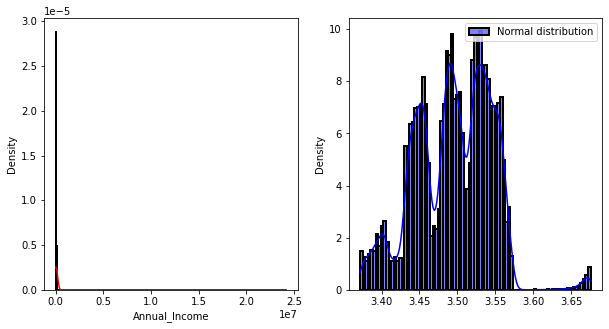

In [130]:
fittedData, lambdaValue = stats.boxcox(df_train['Annual_Income'])  
  
# creating the axes to draw plots of datasets  
fig, ax = plt.subplots(1, 2)  
  
#plotting the non-normal or original data using histplot() function  
sns.histplot(df_train['Annual_Income'], kde = True,stat="density",linewidth=2,label = "Non-Normal distribution", color ="red", ax = ax[0])  
  
#plotting the normal or original data using the histplot() function  
sns.histplot(fittedData, kde = True,stat="density",linewidth=2,label = "Normal distribution", color ="blue", ax = ax[1])  
  
# adding legends to the subplots  
plt.legend(loc = "upper right")  
# rescaling the subplots  
fig.set_figheight(5)  
fig.set_figwidth(10)  
print(f"Lambda value used for Transformation: {lambdaValue}")  
#displaying the plots  
plt.show()  

In [131]:
df_train['Annual_Income'] = fittedData
df_train['Annual_Income'].head()

0   3.452761
1   3.452761
2   3.452761
3   3.452761
4   3.452761
Name: Annual_Income, dtype: float64

In [132]:
stat, p_value = shapiro(df_train['Annual_Income'])
stat, p_value


(0.9718908667564392, 0.0)

#### Checking dependence of categorical features on target variable

dependence of the Occupation and Credit Score

In [133]:
Occupation=df_train["Occupation"]
Credit_Score= Y

stats_value= stats.chi2_contingency(pd.crosstab(Occupation, Credit_Score))
print("Stats value: ", stats_value)
#Chi square critical
Chi_square_critical= stats.chi2.isf(0.05,1)
print("Chi_square_critical: ", Chi_square_critical)

Stats value:  (159.29856638429587, 2.546830550258045e-20, 28, array([[1697.56133101, 3383.94260356, 1171.49606544],
       [1751.31427256, 3491.09447234, 1208.5912551 ],
       [1695.66097449, 3380.15440618, 1170.18461934],
       [1680.45812233, 3349.84882713, 1159.69305054],
       [1712.76418316, 3414.24818261, 1181.98763423],
       [1685.61623288, 3360.13107716, 1163.25268996],
       [1680.18664283, 3349.30765607, 1159.5057011 ],
       [1803.1668576 , 3594.45814374, 1244.37499866],
       [1620.73263171, 3230.79119514, 1118.47617314],
       [1708.69199062, 3406.13061679, 1179.17739259],
       [1712.22122416, 3413.1658405 , 1181.61293534],
       [1604.44386155, 3198.32093188, 1107.23520658],
       [1720.90856825, 3430.48331424, 1187.60811751],
       [1660.09715962, 3309.26099804, 1145.64184234],
       [1623.17594724, 3235.66173463, 1120.16231813]]))
Chi_square_critical:  3.8414588206941285


In [134]:
#Since the chi-square statistics 159.29 is very high than chi-square-critical value, the null hypothesis is rejected.
#Since the p-value is less than 0.05, the null hypothesis is rejected.
#It indicates that there is strong relation between Occupation and Credit score for 95% confidence level.

Checking a relationship between the Payment Behaviour and Credit Score

In [135]:
Spending_Behaviour=df_train["Spending_Behaviour"]
Credit_Score= Y

stats_value= stats.chi2_contingency(pd.crosstab(Spending_Behaviour, Credit_Score))
print("Stats value: ", stats_value)
#Chi square critical
Chi_square_critical= stats.chi2.isf(0.05,1)
print("Chi_square_critical: ", Chi_square_critical)

Stats value:  (847.4685347353172, 9.430742543609459e-185, 2, array([[11772.70863891, 23467.88277678,  8124.40858431],
       [13584.29136109, 27079.11722322,  9374.59141569]]))
Chi_square_critical:  3.8414588206941285


Checking a relationship between the Payment_values and Credit Score

In [136]:
#Since the chi-square values are very high than chi-square-critical value, the null hypothesis is rejected.
#It indicates that there is strong relation between Spending Behaviour and Credit score for 95% confidence level.

In [137]:
Payment_values=df_train["Payment_values"]
Credit_Score= Y

stats_value= stats.chi2_contingency(pd.crosstab(Payment_values, Credit_Score))
print("Stats value: ", stats_value)
#Chi square critical
Chi_square_critical= stats.chi2.isf(0.05,1)
print("Chi_square_critical: ", Chi_square_critical)

Stats value:  (721.3287781805438, 8.389802696086054e-155, 4, array([[ 6690.6123465 , 13337.16063724,  4617.22701626],
       [ 8641.46405362, 17226.01583461,  5963.52011177],
       [10024.92359988, 19983.82352815,  6918.25287196]]))
Chi_square_critical:  3.8414588206941285


In [138]:
#Since the chi-square values are very high than chi-square-critical value, the null hypothesis is rejected.
#It indicates that there is strong relation between Payment_values and Credit score for 95% confidence level.

Checking a relationship between the Payment Behaviour and Payment_values

In [139]:
Payment_values=df_train["Payment_values"]
Spending_Behaviour=df_train["Spending_Behaviour"]

stats_value= stats.chi2_contingency(pd.crosstab(Payment_values, Spending_Behaviour))
print("Stats value: ", stats_value)
#Chi square critical
Chi_square_critical= stats.chi2.isf(0.05,1)
print("Chi_square_critical: ", Chi_square_critical)

Stats value:  (5832.939935890832, 0.0, 2, array([[11442.14238301, 13202.85761699],
       [14778.44731968, 17052.55268032],
       [17144.41029731, 19782.58970269]]))
Chi_square_critical:  3.8414588206941285


In [ ]:
#It indicates that there is strong relation between Payment_values and Spending_Behaviour for 95% confidence level.

# Modelling

In [ ]:
df1= df_train.copy()

In [ ]:
df_train.drop('Credit_Score', axis=1,inplace=True)

In [ ]:
df_cat=df_train.select_dtypes(include=[np.object])

In [ ]:
df_num=df_train.select_dtypes(include=[np.number])

In [ ]:
df_cat.columns

In [ ]:
df_num.columns

In [ ]:
df_cat.shape

In [ ]:
df_num.shape

In [ ]:

#df_num=df_num.apply(lambda rec:(rec-rec.mean())/rec.std())
#df_num.head()

In [ ]:
encode=pd.get_dummies(data=df_cat,drop_first=True)
encode.head()

In [ ]:
df_train_full=pd.concat([df_num,encode],axis=1)
df_train_full.head()

In [ ]:
df_train_full.shape

In [ ]:
Y.head()

In [ ]:
X=df_train_full.copy()
y=Y.copy()

# Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.25)


# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

In [ ]:
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model

from sklearn import metrics
# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

Decision Tree (Entropy)

In [ ]:
from sklearn.metrics import cohen_kappa_score

In [ ]:
decision_tree_full_ent = DecisionTreeClassifier(criterion = 'entropy', random_state=10)
decision_tree_full_ent = decision_tree_full_ent.fit(X_train, y_train)
y_pred_decision_tree_full_ent = decision_tree_full_ent.predict(X_test)



table_dct_train = classification_report(y_test, y_pred_decision_tree_full_ent)

# print the table
print(table_dct_train)

kappa = cohen_kappa_score(y_test, y_pred_decision_tree_full_ent)
print('kappa value for test dataset:',kappa)

In [ ]:
cm = confusion_matrix(y_test, y_pred_decision_tree_full_ent)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:Poor','Predicted:Standard','Predicted:Good'], index = ['Actual:Poor','Actual:Standard', 'Actual:Good'])

plt.rcParams['figure.figsize'] = [15,8]

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

In [ ]:
#important_features = pd.DataFrame({'Features': X_train.columns, 'Importance': decision_tree_full_ent.feature_importances_})

#important_features.sort_values(by='Importance', ascending=False)

Random Forest

In [ ]:
rf_classification = RandomForestClassifier(n_estimators = 50, random_state = 10)

rf_model = rf_classification.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print(classification_report(y_test, y_pred_rf))

kappa = cohen_kappa_score(y_test, y_pred_rf)
print('kappa value for test dataset:',kappa)

Adaboost

In [ ]:
# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [ ]:
ada_model = AdaBoostClassifier(n_estimators = 100, random_state = 10)

# fit the model using fit() on train data
ada_model.fit(X_train, y_train)

In [ ]:
y_pred_ada = ada_model.predict(X_test)

print(classification_report(y_test, y_pred_ada))

kappa = cohen_kappa_score(y_test, y_pred_ada)
print('kappa value:',kappa)

Gradient Boosting

In [ ]:
gboost_model = GradientBoostingClassifier(n_estimators = 10, max_depth = 10, random_state = 10)

# fit the model using fit() on train data
gboost_model.fit(X_train, y_train)

In [ ]:
y_pred_gboost = gboost_model.predict(X_test)

print(classification_report(y_test, y_pred_gboost))

kappa = cohen_kappa_score(y_test, y_pred_gboost)
print('kappa value:',kappa)

XG Boosting

In [ ]:
!pip install xgboost
from xgboost import XGBClassifier

xgb_model = XGBClassifier(max_depth = 10, gamma = 1)

# fit the model using fit() on train data
xgb_model.fit(X_train, y_train)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)

print(classification_report(y_test, y_pred_xgb))
kappa = cohen_kappa_score(y_test, y_pred_xgb)
print('kappa value:',kappa)

In [ ]:
#XGBoost model shows best performance parameters on test set.

In [ ]:
kfold = KFold(n_splits=10 , random_state=1, shuffle=True)

xgbc_score = cross_val_score(xgb_model, X, y , cv=kfold, scoring='accuracy', n_jobs=-1)

print(xgbc_score)
print('Cross-Val Score: ' ,xgbc_score.mean())

# Feature Selection

In [ ]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': xgb_model.feature_importances_})

important_features_sorted = important_features.sort_values('Importance', ascending = False)


sns.barplot(x = 'Importance', y = 'Features', data = important_features_sorted)


plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

plt.show()

In [ ]:
dfs=important_features_sorted['Features'][:10].to_frame().reset_index()

In [ ]:
l1 =list(dfs['Features'])

In [ ]:
xgb_model_top_10_features = XGBClassifier(max_depth = 10, gamma = 1)

# fit the model using fit() on train data
xgb_model_top_10_features.fit(X_train.loc[:,l1], y_train)

In [ ]:
y_pred_xgb_top10 = xgb_model_top_10_features.predict(X_test.loc[:,l1])

print(classification_report(y_test, y_pred_xgb_top10))
kappa = cohen_kappa_score(y_test, y_pred_xgb_top10)
print('kappa value:',kappa)


# Hypertuning Parameters

In [ ]:
tuning_parameters = {'learning_rate': [0.1, 0.2],
                     'max_depth': range(8,15,2),
                     'gamma': [0, 1]}

xgb_model = XGBClassifier()

xgb_grid = GridSearchCV(estimator = xgb_model_top_10_features, param_grid = tuning_parameters, cv = 3, scoring = 'accuracy')

xgb_grid.fit(X_train.loc[:,l1], y_train)



In [ ]:
print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

In [ ]:
def get_test_report(model):

    test_pred = model.predict(X_test.loc[:,l1])

    return(classification_report(y_test, test_pred))

In [ ]:
xgb_grid_model = XGBClassifier(learning_rate = xgb_grid.best_params_.get('learning_rate'),
                               max_depth = xgb_grid.best_params_.get('max_depth'),
                              gamma = xgb_grid.best_params_.get('gamma'))

xgb_model = xgb_grid_model.fit(X_train.loc[:,l1], y_train)

print('Classification Report for test set:\n', get_test_report(xgb_model))

In [ ]:
xgb_grid_model = XGBClassifier(learning_rate = 0.1,
                               max_depth = 11,
                              gamma =1)

xgb_model = xgb_grid_model.fit(X_train.loc[:,l1], y_train)

print('Classification Report for test set:\n', get_test_report(xgb_model))

# Using Test Dataset (df_test) for testing the model

Testing the model on test dataset (remaining 50000 observations)

In [ ]:
df2=df_test.copy()

In [ ]:
df_test.info()

In [ ]:
#yt = pd.DataFrame(df_test['Credit_Score'])

In [ ]:
df_test = df_test.drop('Credit_Score', axis=1)

In [ ]:
df_test_num = df_test.select_dtypes(include=np.number)

In [ ]:
df_test_cat = df_test.select_dtypes(include=np.object)

In [ ]:
df_test_num.shape

In [ ]:
df_test_cat.shape

In [ ]:
#df_test_num = df_test_num.apply(lambda rec:(rec-rec.mean())/rec.std())
#df_test_num.head()

In [ ]:
encode=pd.get_dummies(data=df_test_cat,drop_first=True)
encode.head()

In [ ]:
df_test_full = pd.concat([df_test_num, encode], axis=1)
df_test_full.head()

In [ ]:
df_test_full.shape

In [ ]:
y_pred=xgb_grid_model.predict(df_test_full)

In [ ]:
y_pred

# Combining test dataset output with Customer ID

Pulling customer details of test obervations

In [ ]:
df_test_with_cust_id =pd.read_csv('test.csv')
df_test_with_cust_id.head().T

In [ ]:
Predicted_credit_Score= pd.DataFrame(y_pred)
Predicted_credit_Score.shape

In [ ]:
Customer_ID= pd.DataFrame(df_test_with_cust_id['Customer_ID'])
Customer_ID.shape

In [ ]:
output_dataset= pd.concat([Customer_ID,Predicted_credit_Score], axis=1)
output_dataset.head(100)

In [ ]:
output_dataset.columns = ['Customer ID','Predicted credit Score']

In [ ]:
output_dataset.head(100)

In [ ]:
output_dataset.to_excel(r'C:\Users\lenova\Documents\In class work files\ML project\Project 4 (1)\Output_dataset_new.xlsx', index=False)